### Kerry Back, Rice University, Original Source

<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/11-backtest_sector.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Rice MBA candidate Ray Lee adds extension based on professor Kerry's handout


## Read data

- Penny stocks have been eliminated
- Data includes both large caps and small caps.  You can filter to small caps if you want.
- Filter to your sector.

In [304]:
from google.colab import drive
import sys
from joblib import load
import pandas as pd

drive.mount('/content/drive', force_remount=True)

folder_path = '/content/drive/MyDrive/MGMT767/merged_database_04302024.csv'
sys.path.append(folder_path)


Mounted at /content/drive


In [305]:
df = pd.read_csv(folder_path)
df.tail()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,closeunadj,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss
1122503,3158751,ZYXI,2024-03-29,410.8,8.9,-0.031323,0.174704,106661.40,0.066006,12.77,12.77,0.168182,-0.138665,0.038452,Healthcare,0.115083,15714.25,0.0,30400.75,0.516903
1122504,3158752,ZYXI,2024-04-05,397.9,8.6,-0.000808,0.025000,114093.75,0.065290,12.37,12.37,0.168182,-0.138665,0.038452,Healthcare,0.095117,21565.40,48.2,38904.40,0.554318
1122505,3158753,ZYXI,2024-04-12,397.6,8.6,-0.036408,0.057566,131059.40,0.065401,12.36,12.36,0.168182,-0.138665,0.038452,Healthcare,0.102599,15484.80,519.8,30408.40,0.509228
1122506,3158754,ZYXI,2024-04-19,383.1,8.3,-0.044500,0.051089,117266.80,0.065897,11.91,11.91,0.168182,-0.138665,0.038452,Healthcare,0.109365,26955.00,1076.8,44156.00,0.610449
1122507,3158755,ZYXI,2024-04-26,366.1,7.9,-0.014938,0.067726,133455.20,0.064197,11.38,11.38,0.168182,-0.138665,0.038452,Healthcare,0.106969,28044.40,735.4,40218.60,0.697299


In [306]:
#If Fama-French data is not updated yet, we will filter out the date
#df = df[df['date']< "2024-04-01"]

In [307]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,closeunadj,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss
0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,63.068,65.75,0.051039,-0.171638,0.022993,Healthcare,0.080747,111753.0,204.666667,554732.666667,0.201454
1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,63.049,65.73,0.051039,-0.171638,0.022993,Healthcare,0.081379,146847.4,232.800000,477696.400000,0.307407
2,450,A,2018-08-17,21280.0,4.6,-0.024151,0.077906,2255599.2,0.036668,63.558,66.26,0.051039,-0.171638,0.022993,Healthcare,0.066923,303841.4,127.400000,988129.000000,0.307492
3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,62.023,64.66,0.051039,-0.171638,0.022993,Healthcare,0.079415,156824.0,33.600000,666870.800000,0.235164
4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,63.289,65.98,0.064328,-0.152186,0.002575,Healthcare,0.074957,125026.0,2.400000,425225.800000,0.294023


In [308]:
#Uncomment this section if we want to filter the marketcap
# uncomment and execute the following to filter to small caps
"""
df["rnk"] = df.groupby("date", group_keys=False).marketcap.rank(
    ascending=False,
    method="first"
)
df = df[(df.rnk>1000) & (df.rnk<=3000)]
df = df.drop(columns=["rnk"])
"""

'\ndf["rnk"] = df.groupby("date", group_keys=False).marketcap.rank(\n    ascending=False,\n    method="first"\n)\ndf = df[(df.rnk>1000) & (df.rnk<=3000)]\ndf = df.drop(columns=["rnk"])\n'

In [309]:
#Check the industry in our file
df[df.date == df.date.max()].groupby("sector").ticker.count()

sector
Basic Materials           190
Communication Services    141
Consumer Cyclical         387
Consumer Defensive        168
Energy                    170
Financial Services        631
Healthcare                890
Industrials               482
Real Estate               235
Technology                553
Utilities                  80
Name: ticker, dtype: int64

### Select a sector

In [310]:
#Select sector if we want to see certain industry
"""
sector = "Healthcare"
df = df[df.sector==sector]
"""

'\nsector = "Healthcare"\ndf = df[df.sector==sector]\n'

In [311]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,closeunadj,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss
0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,63.068,65.75,0.051039,-0.171638,0.022993,Healthcare,0.080747,111753.0,204.666667,554732.666667,0.201454
1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,63.049,65.73,0.051039,-0.171638,0.022993,Healthcare,0.081379,146847.4,232.800000,477696.400000,0.307407
2,450,A,2018-08-17,21280.0,4.6,-0.024151,0.077906,2255599.2,0.036668,63.558,66.26,0.051039,-0.171638,0.022993,Healthcare,0.066923,303841.4,127.400000,988129.000000,0.307492
3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,62.023,64.66,0.051039,-0.171638,0.022993,Healthcare,0.079415,156824.0,33.600000,666870.800000,0.235164
4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,63.289,65.98,0.064328,-0.152186,0.002575,Healthcare,0.074957,125026.0,2.400000,425225.800000,0.294023


## Define model and target

- Current code uses max_depth=4 and n_estimators=200
- Two possible targets: return in excess of the median or rank of the return.
- Comment one of them out.

In [312]:
df["target"] = df.groupby("date", group_keys=False).ret.apply(
    lambda x: 100 * (x-x.median())
)

"""
# could use this instead

df["target"] = df.groupby("date", group_keys=False).ret.apply(
    lambda x: 100 * x.rank(pct=True)
)

"""

'\n# could use this instead\n\ndf["target"] = df.groupby("date", group_keys=False).ret.apply(\n    lambda x: 100 * x.rank(pct=True)\n)\n\n'

In [313]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,...,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss,target
0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,63.068,...,0.051039,-0.171638,0.022993,Healthcare,0.080747,111753.0,204.666667,554732.666667,0.201454,-0.369621
1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,63.049,...,0.051039,-0.171638,0.022993,Healthcare,0.081379,146847.4,232.800000,477696.400000,0.307407,0.576998
2,450,A,2018-08-17,21280.0,4.6,-0.024151,0.077906,2255599.2,0.036668,63.558,...,0.051039,-0.171638,0.022993,Healthcare,0.066923,303841.4,127.400000,988129.000000,0.307492,-2.810893
3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,62.023,...,0.051039,-0.171638,0.022993,Healthcare,0.079415,156824.0,33.600000,666870.800000,0.235164,1.073720
4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,63.289,...,0.064328,-0.152186,0.002575,Healthcare,0.074957,125026.0,2.400000,425225.800000,0.294023,2.049839


## Define predictors (features)

- Leaving out interactions with market volatility, because they didn't seem to make much difference.

In [314]:
features = [
    "marketcap",
    "pb",
    "mom",
    "volume",
    "volatility",
    "roe",
    "accruals",
    "agr",
    "relss"
]
features.sort()

## Define training dates and training windows

- Start training once we have three years of data.
- Specify num_years_for_training $\ge 3$ as the number of years of past data to train on in each iteration of the backtesting loop.

In [315]:
num_years_for_training = 3

In [316]:
for x in features:
  df[x+"_vol"] = df[x]*df.mktvol

features += [x+"_vol" for x in features]

In [317]:
dates = list(df.date.unique())
dates.sort()
train_dates = dates[156::52]  # once per year starting after three years

past_dates = {}               # dates on which to train for each training date
future_dates = {}             # dates for which to predict for each training date
for date in train_dates:
    start_index = dates.index(date) - 52*num_years_for_training
    start_index = start_index if start_index >= 0 else 0
    past_dates[date] = dates[start_index:dates.index(date)]
    if date < train_dates[-1]:
        future_dates[date] = dates[dates.index(date):(dates.index(date)+52)]
    else:
        future_dates[date] = dates[dates.index(date):]

## Run the loop for XGBoost

In [260]:
import xgboost as xgb
boost = xgb.XGBRegressor()

In [261]:
# Load the model
import joblib

folder_path = '/content/drive/MyDrive/MGMT767/XGBoost.pkl'

boost = joblib.load(folder_path)

In [262]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]
    #boost.fit(X=past[features], y=past.target)
    predictions = boost.predict(X=future[features])
    predictions = pd.DataFrame(predictions)
    predictions.columns = ["predict"]
    for col in ["ticker", "date"]:
        predictions[col] = future[col].to_list()
    new_data = pd.concat((new_data, predictions))

df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [263]:
importances = pd.Series(boost.feature_importances_, index=features)
importances.sort_values(ascending=False).round(3)

roe_vol           0.106
roe               0.104
accruals          0.086
relss             0.072
mom               0.064
volume            0.058
marketcap         0.052
accruals_vol      0.052
marketcap_vol     0.051
relss_vol         0.049
volatility        0.042
mom_vol           0.040
agr_vol           0.039
pb                0.039
volume_vol        0.038
agr               0.037
volatility_vol    0.036
pb_vol            0.035
dtype: float32

In [264]:
import joblib

# Save the model
folder_path = '/content/drive/MyDrive/MGMT767/XGBoost.pkl'
joblib.dump(boost, folder_path)


['/content/drive/MyDrive/MGMT767/XGBoost.pkl']

## Run the loop for Random Forest

In [318]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=5, n_estimators=200)

In [319]:
#Load the model
folder_path = '/content/drive/MyDrive/MGMT767/RF_relss.joblib'

from urllib.request import urlopen
forest = load(folder_path)

In [320]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]
    #forest.fit(X=past[features], y=past.target)
    predictions = forest.predict(X=future[features])
    predictions = pd.DataFrame(predictions)
    predictions.columns = ["predict"]
    for col in ["ticker", "date"]:
        predictions[col] = future[col].to_list()
    new_data = pd.concat((new_data, predictions))

df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [321]:
importances = pd.Series(forest.feature_importances_, index=features)
importances.sort_values(ascending=False).round(3)

volume            0.359
marketcap         0.125
relss             0.086
marketcap_vol     0.077
volume_vol        0.068
accruals_vol      0.061
volatility        0.033
accruals          0.033
relss_vol         0.033
roe_vol           0.028
volatility_vol    0.023
mom               0.017
pb_vol            0.013
roe               0.013
mom_vol           0.012
pb                0.010
agr_vol           0.007
agr               0.003
dtype: float64

In [322]:
#Save the model
from joblib import dump
folder_path = '/content/drive/MyDrive/MGMT767/RF_DaystoCover_13weeks.joblib'
dump(forest,folder_path)

['/content/drive/MyDrive/MGMT767/RF_DaystoCover_13weeks.joblib']

## Run the loop for Neural Network



In [270]:
new_data = pd.DataFrame()

In [271]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torch.nn.functional as F

In [272]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

In [273]:
from torchsummary import summary

In [274]:
class NeuralModel(nn.Module):
    def __init__(self, input_size):
        super(NeuralModel, self).__init__()
        self.batch_norm = nn.BatchNorm1d(input_size)
        self.hidden_layer_1 = nn.Linear(input_size, 1024)
        self.dropout_1 = nn.Dropout(0.25)
        self.hidden_layer_2 = nn.Linear(1024, 1024)
        self.dropout_2 = nn.Dropout(0.25)
        self.hidden_layer_3 = nn.Linear(1024, 1024)
        self.dropout_3 = nn.Dropout(0.25)
        self.output_layer = nn.Linear(1024, 1)
        #self.Sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.batch_norm(x)
        x = torch.relu(self.hidden_layer_1(x))
        x = self.dropout_1(x)
        x = torch.relu(self.hidden_layer_2(x))
        x = self.dropout_2(x)
        x = torch.relu(self.hidden_layer_3(x))
        x = self.dropout_3(x)
        #x = self.Sigmoid(self.output_layer(x))
        x = self.output_layer(x)

        return x


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(past[features].values, dtype=torch.float32)
# Normalize target values to be within [0, 1]
#y_train_tensor = torch.tensor((past.target.values - past.target.min()) / (past.target.max() - past.target.min()), dtype=torch.float32)
y_train_tensor = torch.tensor(past.target.values, dtype=torch.float32)
X_test_tensor = torch.tensor(future[features].values, dtype=torch.float32)
#y_test_tensor = torch.tensor(future.target.values, dtype=torch.float32)

# ... (rest of the code remains the same)


# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

input_size = len(features)
neural_model_pytorch = NeuralModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(neural_model_pytorch.parameters(), lr=0.001)
# Initialize the PyTorch model

summary(neural_model_pytorch, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 18]              36
            Linear-2                 [-1, 1024]          19,456
           Dropout-3                 [-1, 1024]               0
            Linear-4                 [-1, 1024]       1,049,600
           Dropout-5                 [-1, 1024]               0
            Linear-6                 [-1, 1024]       1,049,600
           Dropout-7                 [-1, 1024]               0
            Linear-8                    [-1, 1]           1,025
Total params: 2,119,717
Trainable params: 2,119,717
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 8.09
Estimated Total Size (MB): 8.13
----------------------------------------------------------------


In [275]:
#Uncomment to train
"""
epochs = 10

for epoch in range(epochs):
    neural_model_pytorch.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = neural_model_pytorch(inputs)
        loss = criterion(outputs, labels.view(-1, 1))  # Pass labels with correct shape
        loss.backward()
        optimizer.step()

    # Calculate loss on the entire training set after each epoch
    with torch.no_grad():
        neural_model_pytorch.eval()
        train_loss = 0.0
        for inputs, labels in train_loader:
            outputs = neural_model_pytorch(inputs)
            train_loss += criterion(outputs, labels.view(-1, 1)).item()
        train_loss /= len(train_loader)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

    # Testing and prediction
    neural_model_pytorch.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        neural_predictions_pytorch = neural_model_pytorch(X_test_tensor).detach().numpy()
"""

'\nepochs = 10\n\nfor epoch in range(epochs):\n    neural_model_pytorch.train()\n    for inputs, labels in train_loader:\n        optimizer.zero_grad()\n        outputs = neural_model_pytorch(inputs)\n        loss = criterion(outputs, labels.view(-1, 1))  # Pass labels with correct shape\n        loss.backward()\n        optimizer.step()\n\n    # Calculate loss on the entire training set after each epoch\n    with torch.no_grad():\n        neural_model_pytorch.eval()\n        train_loss = 0.0\n        for inputs, labels in train_loader:\n            outputs = neural_model_pytorch(inputs)\n            train_loss += criterion(outputs, labels.view(-1, 1)).item()\n        train_loss /= len(train_loader)\n\n    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")\n\n    # Testing and prediction\n    neural_model_pytorch.eval()  # Set the model to evaluation mode\n    with torch.no_grad():\n        neural_predictions_pytorch = neural_model_pytorch(X_test_tensor).detach().numpy

In [276]:
#Save the model
folder_path = '/content/drive/MyDrive/MGMT767'
torch.save(neural_model_pytorch.state_dict(), folder_path + '/mnist_1_DaysToCover_0412.pth')

In [277]:
folder_path = '/content/drive/MyDrive/MGMT767'


neural_model_pytorch.load_state_dict(torch.load(folder_path + '/mnist_1_Short_Volumn_0412.pth'))

<All keys matched successfully>

In [278]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

    # Generate predictions for the current date
    predictions = neural_model_pytorch(torch.tensor(future[features].values, dtype=torch.float32)).detach().numpy()

    predictions_df = pd.DataFrame(predictions, columns=["predict"])
    for col in ["ticker", "date"]:
        predictions_df[col] = future[col].to_list()

    if new_data is None:
        new_data = predictions_df
    else:
        new_data = pd.concat((new_data, predictions_df))

# Merge the predictions with the original DataFrame
df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [279]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,...,marketcap_vol,mom_vol,pb_vol,relss_vol,roe_vol,volatility_vol,volume_vol,predict_x,predict_y,predict
0,604,A,2021-07-30,44782.2,9.3,0.006036,0.561004,2088322.6,0.026441,149.603,...,4920.086867,0.061636,1.021763,0.033624,0.020881,0.002905,229437.781052,-0.201550,-0.001183,-0.030687
1,605,A,2021-08-06,45592.3,9.5,0.016119,0.554474,1974071.2,0.023817,150.506,...,5176.614357,0.062956,1.078643,0.036452,0.021579,0.002704,224138.841791,-0.201550,0.001151,0.008029
2,606,A,2021-08-13,46448.1,9.7,0.022677,0.543860,1592209.8,0.023652,152.932,...,5171.094849,0.060548,1.079907,0.045791,0.021159,0.002633,177261.672589,0.243456,0.013793,0.211006
3,607,A,2021-08-20,47501.0,9.9,0.055889,0.538995,1413820.6,0.023047,156.400,...,4930.481161,0.055946,1.027594,0.054305,0.019727,0.002392,146750.928036,0.598879,0.510736,0.462901
4,608,A,2021-08-27,49179.0,10.2,0.033783,0.559030,2365394.8,0.024520,165.141,...,4094.094831,0.046539,0.849138,0.039142,0.015822,0.002041,196916.379453,0.277476,0.182138,0.389902


In [280]:
import numpy as np
import pandas as pd

# Get the fully connected layer weights
for name, module in neural_model_pytorch.named_modules():
    if isinstance(module, nn.Linear):
        fc_weights = module.weight.data.numpy()
        break  # Assuming you have only one fully connected layer
else:
    raise ValueError("No fully connected layer found in the model.")

# Compute feature importance from the weights
feature_importance = np.mean(np.abs(fc_weights), axis=0)

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance (if needed)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


           Feature  Importance
13          pb_vol    0.120998
5            relss    0.119750
14       relss_vol    0.119306
12         mom_vol    0.118757
11   marketcap_vol    0.118299
9     accruals_vol    0.118263
2        marketcap    0.117995
3              mom    0.116758
6              roe    0.116449
1              agr    0.115631
4               pb    0.115518
15         roe_vol    0.115364
17      volume_vol    0.114666
0         accruals    0.113737
7       volatility    0.113596
8           volume    0.113243
16  volatility_vol    0.112906
10         agr_vol    0.112597


## Calculate portfolio returns

- Specify how many stocks you want to hold in each (long or short) portfolio

In [281]:
numstocks = 40

In [282]:
df["rnk_long"] = df.groupby("date", group_keys=False).predict.rank(
    ascending=False,
    method="first"
)
df["rnk_short"] = df.groupby("date", group_keys=False).predict.rank(
    ascending=True,
    method="first"
)


longs = df[df.rnk_long<=numstocks]
shorts = df[df.rnk_short<=numstocks]

In [283]:
long_ret = longs.groupby("date").ret.mean()
short_ret = shorts.groupby("date").ret.mean()
print(f"mean annualized long return is {52*long_ret.mean():.2%}")
print(f"mean annualized short return is {52*short_ret.mean():.2%}")

mean annualized long return is 157.14%
mean annualized short return is -177.17%


In [284]:
long_ret_df = pd.DataFrame(long_ret)
long_ret_df = long_ret_df.reset_index()
long_ret_df['date'] = pd.to_datetime(long_ret_df['date'])
short_ret_df = pd.DataFrame(short_ret)
short_ret_df = short_ret_df.reset_index()
short_ret_df['date'] = pd.to_datetime(short_ret_df['date'])

In [285]:
price = yf.download("SPY", start="2021-11-12", end ="2024-03-27",interval='1wk')["Adj Close"]
ret_mk = price.pct_change()
ret_mk_df = pd.DataFrame(ret_mk)
ret_mk_df = ret_mk_df.reset_index()
ret_mk_df['Date'] = pd.to_datetime(ret_mk_df['Date'])
ret_mk_df = ret_mk_df.dropna()
ret_mk_df = ret_mk_df.rename(columns={"Adj Close": "ret"})

[*********************100%%**********************]  1 of 1 completed


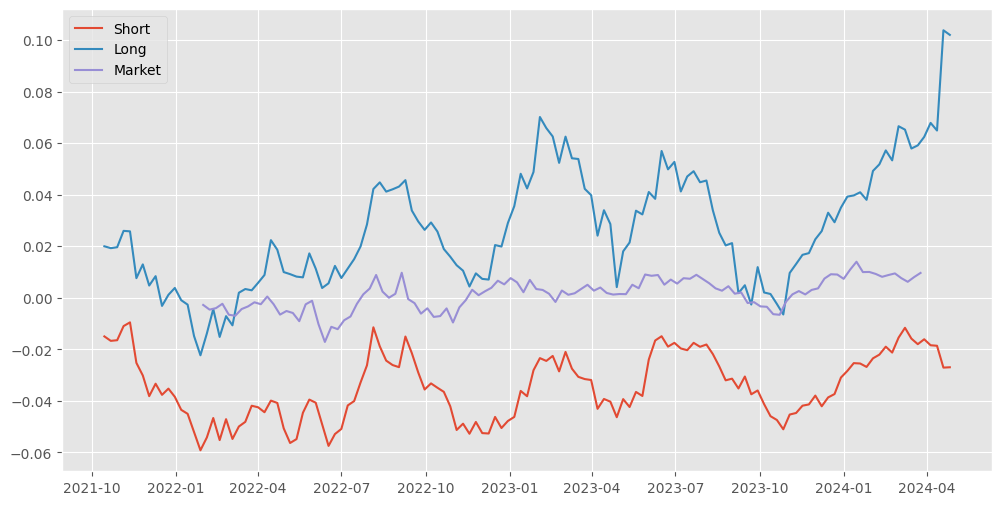

In [286]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])

fig, ax = plt.subplots()
# Create a new figure with the desired size
fig.set_size_inches(12, 6)

Moving = 12

ax.plot(short_ret_df.date,short_ret_df.ret.rolling(Moving).mean())
ax.plot(long_ret_df.date,long_ret_df.ret.rolling(Moving).mean())
ax.plot(ret_mk_df.Date,ret_mk_df.ret.rolling(Moving).mean())


# The 'legend' function takes the labels as a list, so you need to provide them as a list
ax.legend(['Short', 'Long', "Market"])

plt.show()

In [327]:
import yfinance as yf
import numpy as np

long_ret_1 = long_ret + 1
#short_ret_1 = short_ret * -1 + 1
short_ret_1 = short_ret + 1
long_ret_1 = long_ret_1.cumprod()
short_ret_1 = short_ret_1.cumprod()

short_ret_1 = pd.DataFrame(short_ret_1)
short_ret_1 = short_ret_1.reset_index()
short_ret_1['date'] = pd.to_datetime(short_ret_1['date'])


long_ret_1 = pd.DataFrame(long_ret_1)
long_ret_1 = long_ret_1.reset_index()
long_ret_1['date'] = pd.to_datetime(long_ret_1['date'])


ret_mk_1 = ret_mk + 1
ret_mk_1 = ret_mk_1.cumprod()
ret_mk_1 = ret_mk_1.dropna()

ret_mk_1 = pd.DataFrame(ret_mk_1)
ret_mk_1 = ret_mk_1.reset_index()
ret_mk_1 = ret_mk_1.rename(columns={"Adj Close": "ret"})

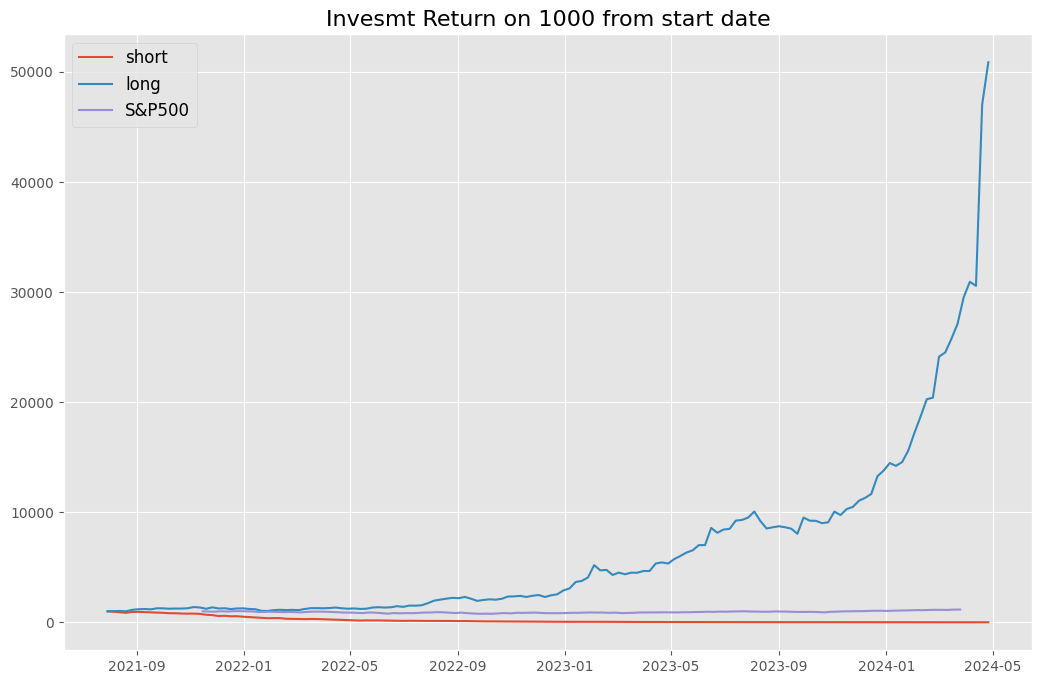

In [328]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])

fig, ax = plt.subplots()
# Create a new figure with the desired size
fig.set_size_inches(12.5, 8)

ax.plot(short_ret_1.date, short_ret_1.ret*1000)
ax.plot(long_ret_1.date, long_ret_1.ret*1000)
ax.plot(ret_mk_1.Date,ret_mk_1.ret*1000)


# The 'legend' function takes the labels as a list, so you need to provide them as a list
ax.legend(['short', 'long', 'S&P500'], fontsize='large')
ax.set_title('Invesmt Return on 1000 from start date', fontsize=16)


plt.show()

## Evaluate returns

### Get weekly factors and risk-free rate

- There is some weekly data on French's website, but not everything we want is available weekly.
- So, we will get daily data and compound to weekly.

In [289]:
from pandas_datareader import DataReader as pdr

famafrench = pdr("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start=2010)[0] / 100
famafrench.index.name = "date"
famafrench = famafrench.reset_index()
famafrench["year"] = famafrench.date.apply(lambda x: x.isocalendar()[0])
famafrench["week"] = famafrench.date.apply(lambda x: x.isocalendar()[1])

ff = None
for col in ["Mkt-RF", "SMB", "HML", "CMA", "RMW", "RF"]:
    ser = famafrench.groupby(["year", "week"], group_keys=True)[col].apply(
        lambda x: (1+x).prod() - 1
    )
    ser.name = col
    ff = pd.concat((ff, ser), axis=1)
ff["date"] = famafrench.groupby(["year", "week"], group_keys=True).date.last()
ff = ff.reset_index(drop=True)
ff = ff.set_index("date")

<ipython-input-289-629e455ed9f0>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench = pdr("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start=2010)[0] / 100


In [290]:
mom = pdr("F-F_Momentum_Factor_daily", "famafrench", start=2010)[0]/100
mom.index.name = "date"
mom.columns = ["UMD"]
mom = mom.reset_index()
mom["year"] = mom.date.apply(lambda x: x.isocalendar()[0])
mom["week"] = mom.date.apply(lambda x: x.isocalendar()[1])

umd = mom.groupby(["year", "week"], group_keys=True).UMD.apply(
    lambda x: (1+x).prod() - 1
)
umd = pd.DataFrame(umd)
umd["date"] = mom.groupby(["year", "week"], group_keys=True).date.last()
umd = umd.reset_index(drop=True)
umd = umd.set_index("date")

<ipython-input-290-43aae452051b>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mom = pdr("F-F_Momentum_Factor_daily", "famafrench", start=2010)[0]/100


### Combine factors and long returns

In [291]:
long_ret.name = "ret"
long_ret.index = pd.to_datetime(long_ret.index)
data = pd.concat((ff, umd, long_ret), axis=1).dropna()
data.head(3)

,Mkt-RF,SMB,HML,CMA,RMW,RF,UMD,ret
date,,,,,,,,
2021-07-30,-0.004546,0.009760,0.020434,0.011785,0.005128,0.0,0.012218,0.007509
2021-08-06,0.010492,0.000477,0.006976,-0.012897,-0.005517,0.0,0.015559,0.017666
2021-08-13,0.005008,-0.014091,0.023291,0.009276,0.017238,0.0,0.002224,0.008042


In [292]:
short_ret.name = "ret"
short_ret.index = pd.to_datetime(short_ret.index)
data = pd.concat((ff, umd, short_ret), axis=1).dropna()
data.head(3)

,Mkt-RF,SMB,HML,CMA,RMW,RF,UMD,ret
date,,,,,,,,
2021-07-30,-0.004546,0.009760,0.020434,0.011785,0.005128,0.0,0.012218,-0.012635
2021-08-06,0.010492,0.000477,0.006976,-0.012897,-0.005517,0.0,0.015559,-0.019676
2021-08-13,0.005008,-0.014091,0.023291,0.009276,0.017238,0.0,0.002224,-0.059058


### Sharpe ratio

In [329]:
import numpy as np

sharpe = np.sqrt(52) * (data.ret - data.RF).mean() / data.ret.std()
print(f"annualized Sharpe ratio is {sharpe:.2%}")

annualized Sharpe ratio is -534.64%


### Market alpha and information ratio

In [294]:
import statsmodels.formula.api as smf

data["ret_rf"] = data.ret - data.RF
data["mkt_rf"] = data["Mkt-RF"]
result = smf.ols("ret_rf ~ mkt_rf", data).fit()

alpha = 52*result.params["Intercept"]
resid_stdev = np.sqrt(52 * result.mse_resid)
info_ratio = alpha / resid_stdev

print(f"annualized alpha is {alpha:.2%}")
print(f"annualized information ratio is {info_ratio:.2%}")

annualized alpha is -181.99%
annualized information ratio is -688.97%


In [295]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     76.94
Date:                Wed, 01 May 2024   Prob (F-statistic):           7.05e-15
Time:                        02:13:19   Log-Likelihood:                 257.76
No. Observations:                 136   AIC:                            -511.5
Df Residuals:                     134   BIC:                            -505.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0350      0.003    -11.134      0.0

### Attribution analysis

In [296]:
result.params["Intercept"]

-0.034999013878244334

In [297]:
alpha = 52*result.params["Intercept"]
print(alpha)

-1.8199487216687054


In [298]:
result = smf.ols("ret_rf ~ mkt_rf + SMB + HML + CMA + RMW + UMD", data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     42.22
Date:                Wed, 01 May 2024   Prob (F-statistic):           3.59e-28
Time:                        02:13:19   Log-Likelihood:                 300.78
No. Observations:                 136   AIC:                            -587.6
Df Residuals:                     129   BIC:                            -567.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0318      0.002    -13.443      0.0